<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>

### **Cuerpo Docente:**

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Joaquín Herrera Suárez
- Nombre de alumno 2: Hecmar Taucare Reyes


### **Link de repositorio de GitHub:** [Repositorio](https://github.com/Joaquin-HS/MDS7202)

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

## 1. Problemas Clínicos del Dr. Simi
<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [10]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [41]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/gdrive/MyDrive/Laboratorios/Laboratorio_10/diabetes_data.csv')
# df = pd.read_csv('diabetes_data.csv')

df

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0


In [15]:
df.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

## 2. Clasificación de pacientes con diabetes (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

Tareas:
1. En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento, realice los siguientes pasos:
  * Realice una breve exploración de los datos y determine si aplicará transformaciones (MinMaxScaler, StandardScaler, etc.) en alguna/s de las variables. (1 punto)
  * Cree un conjunto de entrenamiento y uno de prueba, con una proporción de 1/3 en el conjunto de prueba. (0.5 puntos)
  * Cree un ColumnTransformer de preprocesamiento donde aplique las transformaciones determinadas anteriormente. Fije el parámetro `verbose_feature_names_out=False` y fije la salida del ColumnTransformer en formato pandas mediante el método `.set_output(transform='pandas')`. (1 punto)
  *  Cree un pipeline donde integre el preprocesamiento y el modelo `XGBoost` y entrene el modelo. Luego utilice `classification_report(..)` para reportar el desempeño del modelo. (1 punto)

Comente sus decisiones y los resultados obtenidos con el modelo.

2. Luego, le pide responder las siguientes preguntas:
  *  ¿Es acaso un buen predictor de diabetes? (0.5 puntos)
  * ¿Qué buscan explicar las métricas utilizadas? (0.5 puntos)
  * ¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?(0.5 puntos)

### Descripción

In [42]:
!pip install xgboost

In [43]:
print(df.dtypes)

Age                     float64
Sex                     float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Stroke                  float64
HighBP                  float64
Diabetes                float64
dtype: object


In [44]:
df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


In [96]:
df['Sex'].value_counts()

,count
Sex,
0.0,38386
1.0,32306


Por las cantidades, se hará el supuesto de que 0 es sexo femenino, y 1 sexo masculino.

### Nulos

In [45]:
df.isna().sum()

,0
Age,0
Sex,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0
Veggies,0


Se puede observar que en los datos no existen valores nulos.

### Variables binarias

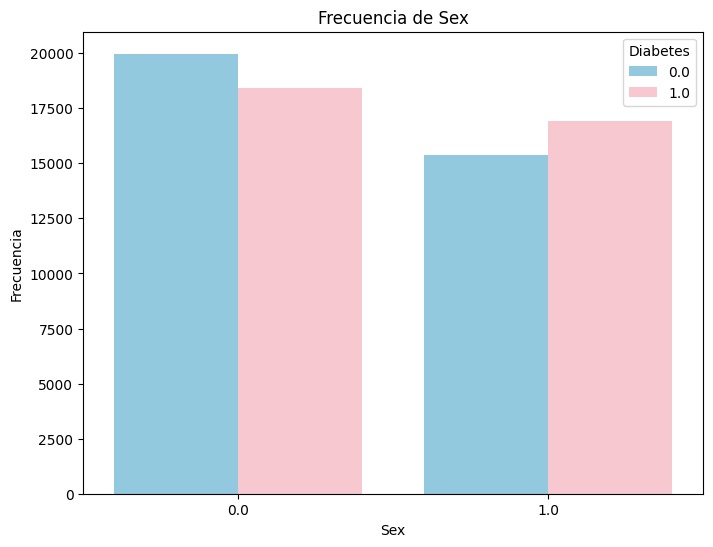

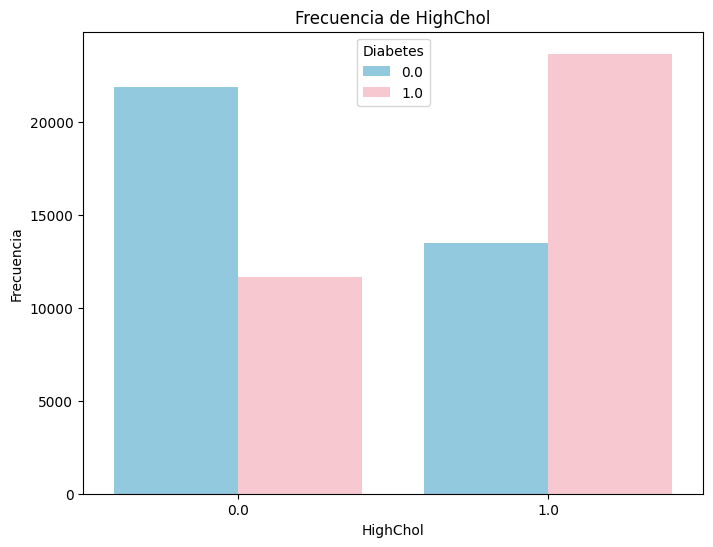

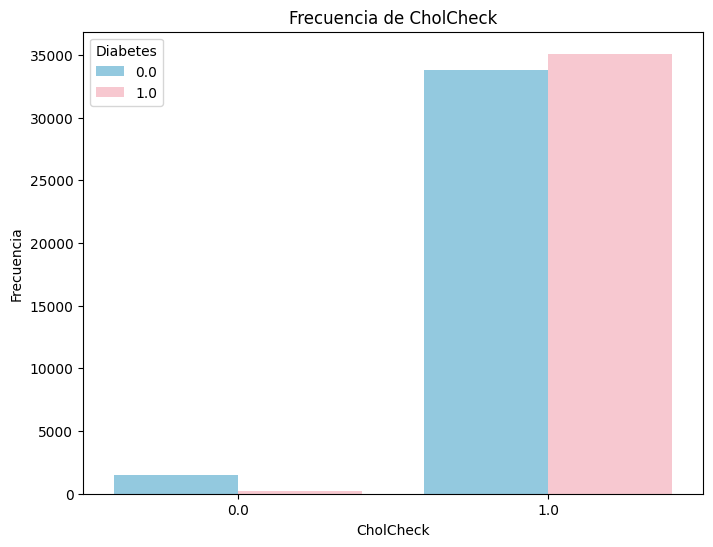

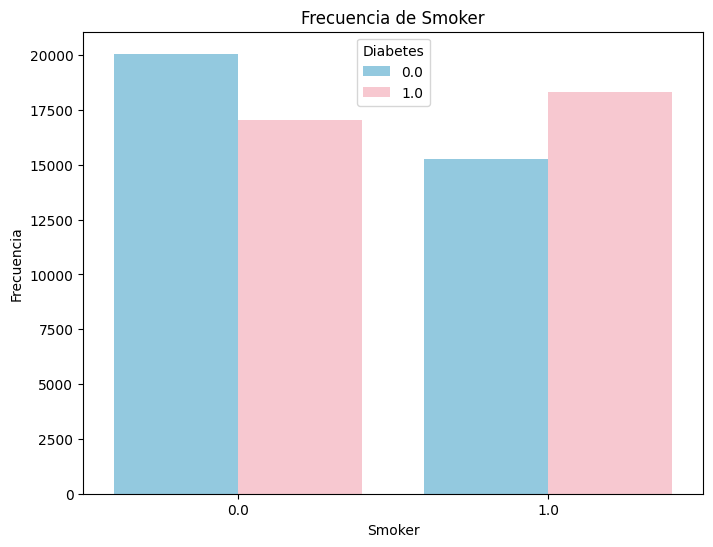

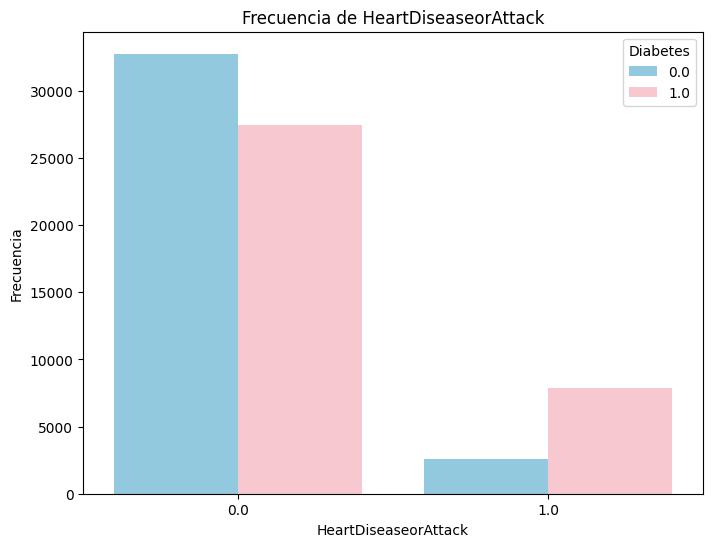

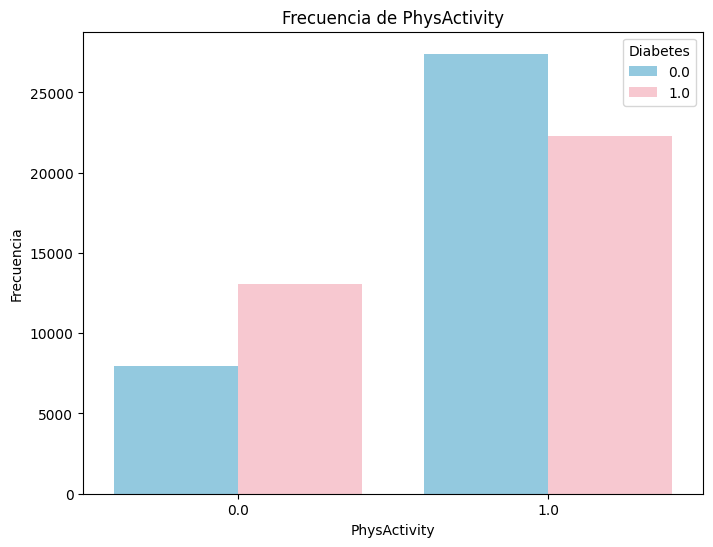

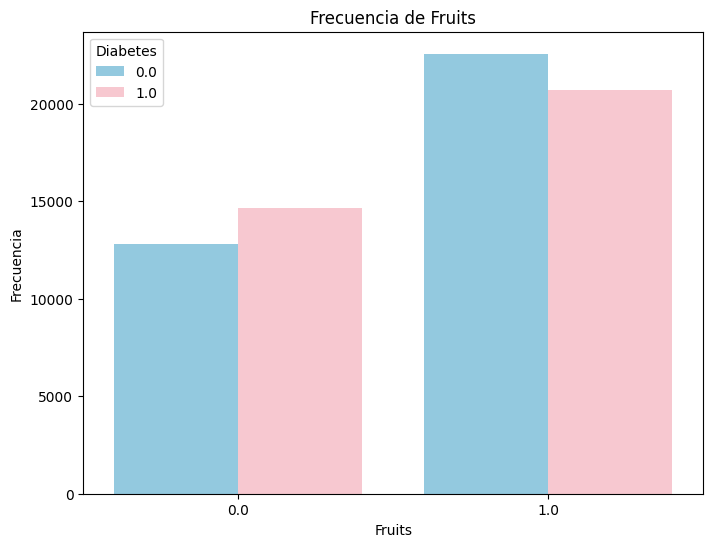

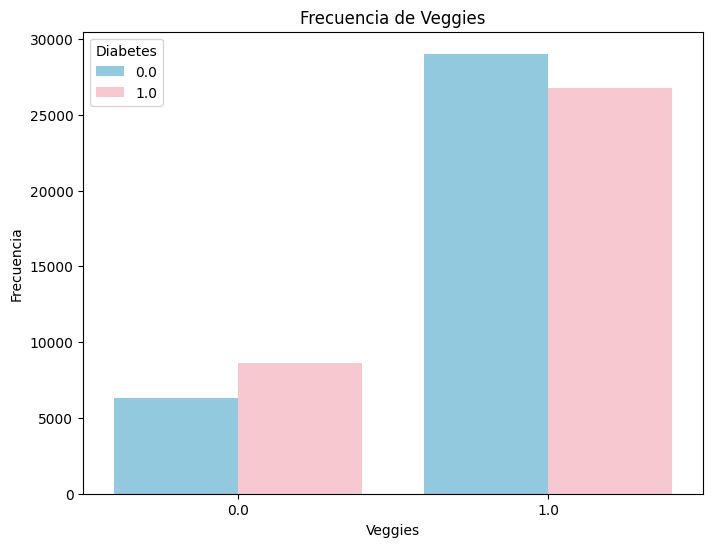

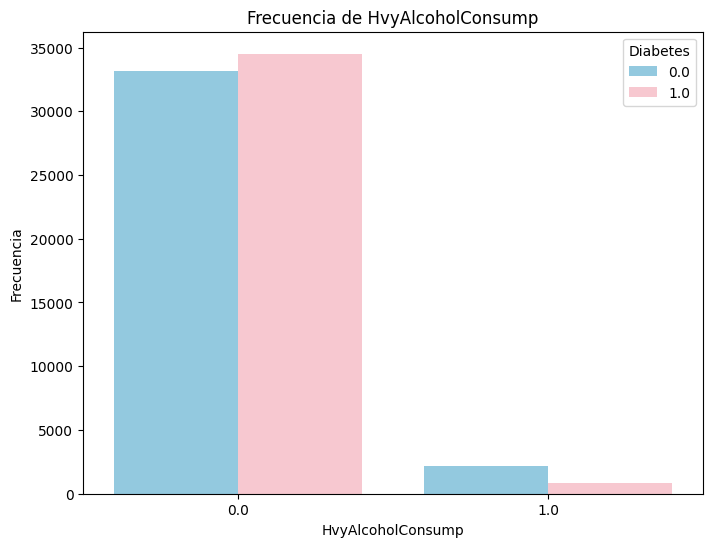

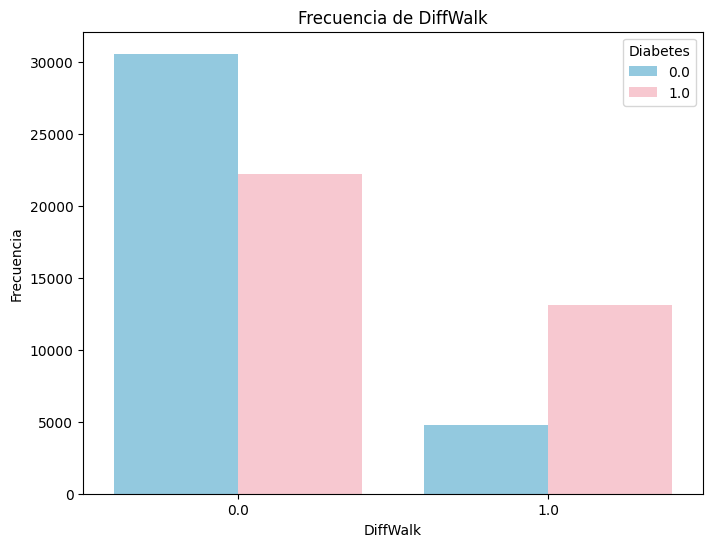

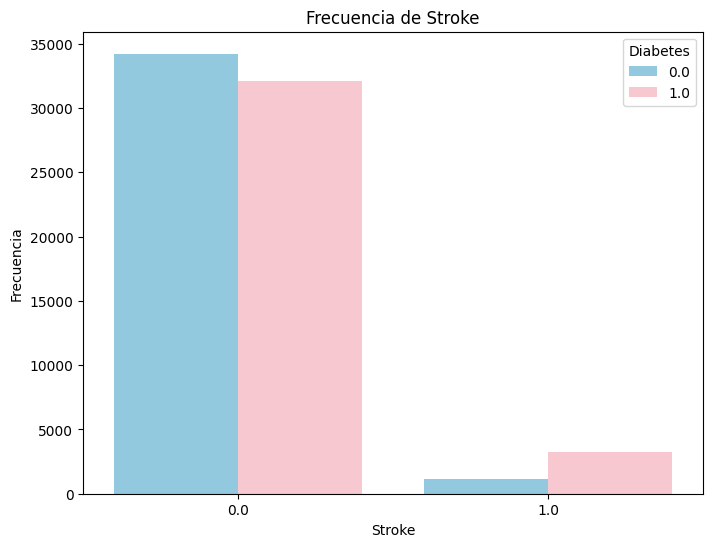

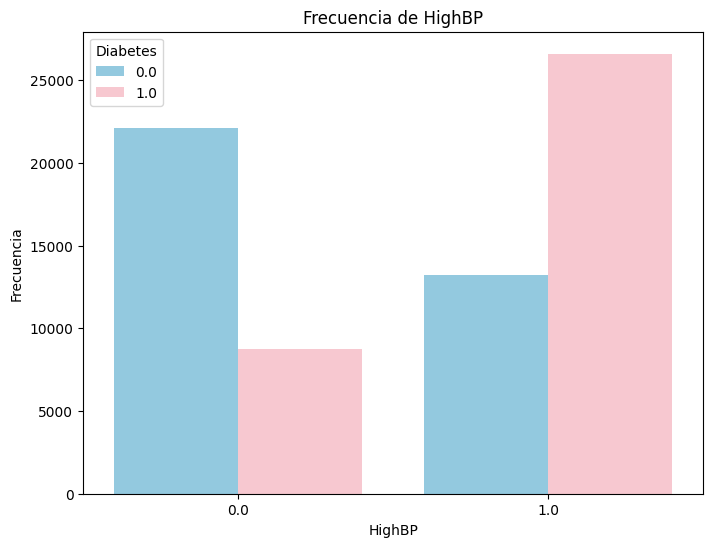

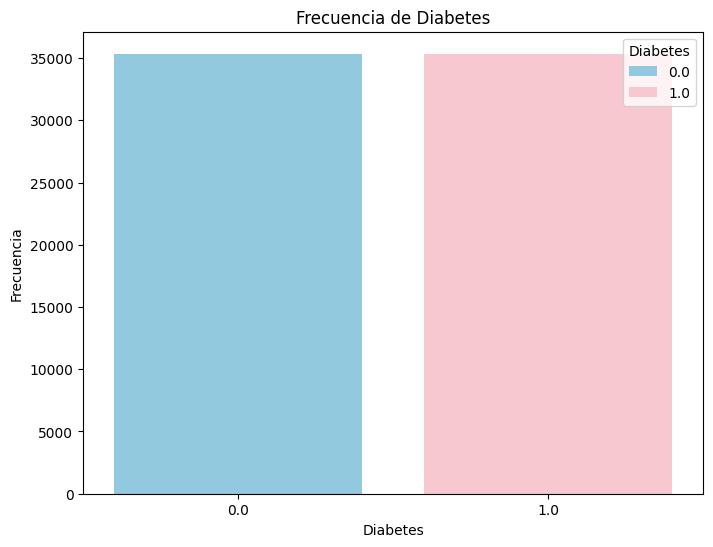

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

columnas = ['Sex', 'HighChol', 'CholCheck', 'Smoker', 'HeartDiseaseorAttack',	'PhysActivity',	'Fruits',	'Veggies', 'HvyAlcoholConsump', 'DiffWalk',	'Stroke',	'HighBP', 'Diabetes']

for columna in columnas:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df[columna], hue=df['Diabetes'], palette=['skyblue', 'pink'])
    plt.title(f'Frecuencia de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.show()

Se destaca que el dataset está balanceado con respecto a la clase diabetes.

### Variables numéricas

#### Continuas

<ipython-input-48-fe426f35e97b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Sex', y='Age', data=df_t,palette=paleta_aesthetic,inner='box')


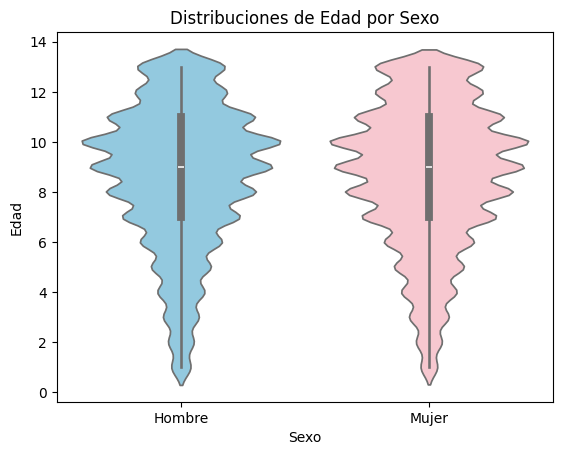

In [48]:
df_t = df.copy()
df_t['Sex'] = df_t['Sex'].replace({0: 'Mujer', 1: 'Hombre'})
paleta_aesthetic = {'Mujer': 'pink', 'Hombre': 'skyblue'}

sns.violinplot(x='Sex', y='Age', data=df_t,palette=paleta_aesthetic,inner='box')
plt.title('Distribuciones de Edad por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Edad')
plt.show()

<ipython-input-49-60240935cbd0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Sex', y='BMI', data=df_t,palette=paleta_aesthetic,inner='box')


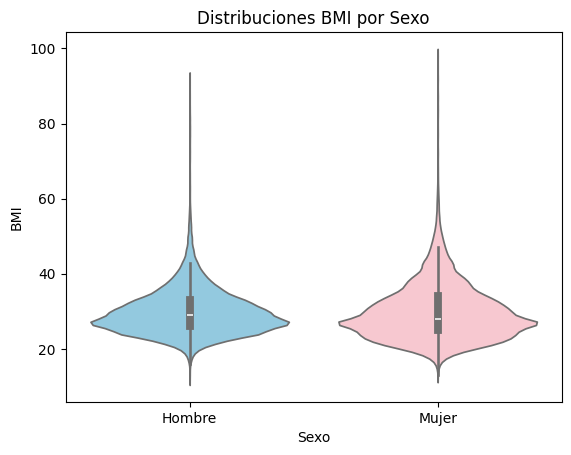

In [49]:
df_t = df.copy()
df_t['Sex'] = df_t['Sex'].replace({0: 'Mujer', 1: 'Hombre'})
paleta_aesthetic = {'Mujer': 'pink', 'Hombre': 'skyblue'}

sns.violinplot(x='Sex', y='BMI', data=df_t,palette=paleta_aesthetic,inner='box')
plt.title('Distribuciones BMI por Sexo')
plt.xlabel('Sexo')
plt.ylabel('BMI')
plt.show()

<ipython-input-66-ff4280340973>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Sex', y='MentHlth', data=df_t,palette=paleta_aesthetic,inner='box')


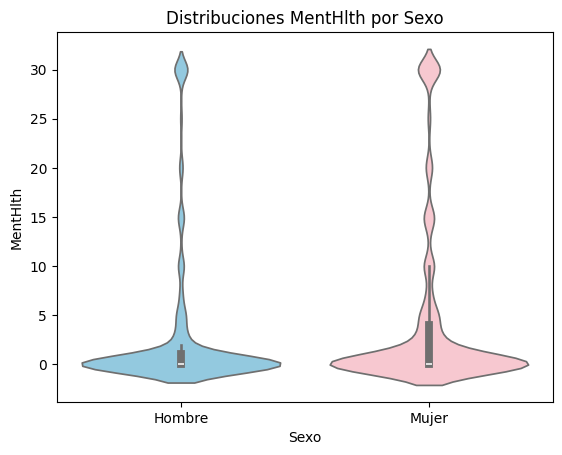

In [66]:
df_t = df.copy()
df_t['Sex'] = df_t['Sex'].replace({0: 'Mujer', 1: 'Hombre'})
paleta_aesthetic = {'Mujer': 'pink', 'Hombre': 'skyblue'}

sns.violinplot(x='Sex', y='MentHlth', data=df_t,palette=paleta_aesthetic,inner='box')
plt.title('Distribuciones MentHlth por Sexo')
plt.xlabel('Sexo')
plt.ylabel('MentHlth')
plt.show()

<ipython-input-67-8e494550c532>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Sex', y='PhysHlth', data=df_t,palette=paleta_aesthetic,inner='box')


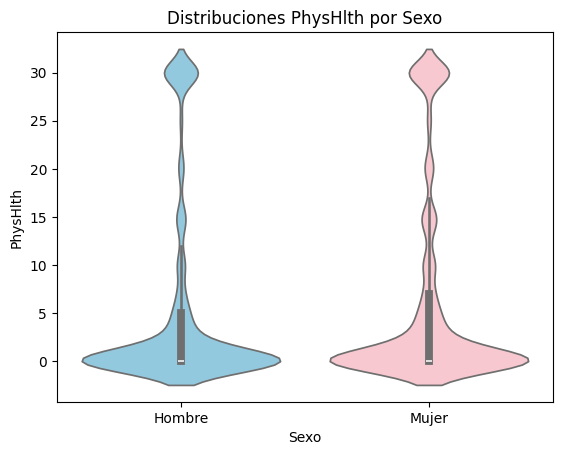

In [67]:
df_t = df.copy()
df_t['Sex'] = df_t['Sex'].replace({0: 'Mujer', 1: 'Hombre'})
paleta_aesthetic = {'Mujer': 'pink', 'Hombre': 'skyblue'}

sns.violinplot(x='Sex', y='PhysHlth', data=df_t,palette=paleta_aesthetic,inner='box')
plt.title('Distribuciones PhysHlth por Sexo')
plt.xlabel('Sexo')
plt.ylabel('PhysHlth')
plt.show()

#### Ordinal

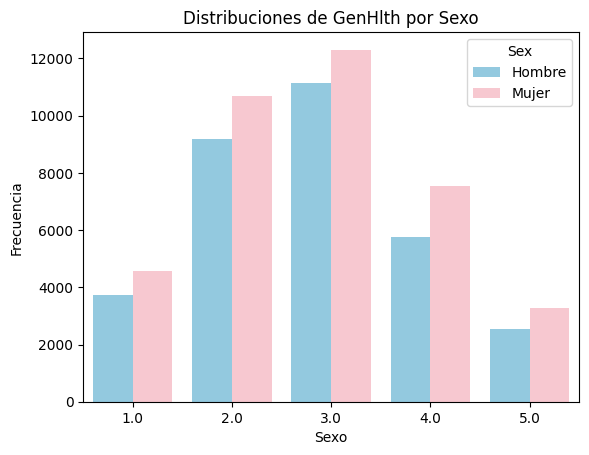

In [64]:
df_t = df.copy()
df_t['Sex'] = df_t['Sex'].replace({0: 'Mujer', 1: 'Hombre'})
paleta_aesthetic = {'Mujer': 'pink', 'Hombre': 'skyblue'}

sns.countplot(data=df_t, x='GenHlth', hue='Sex', palette=paleta_aesthetic)
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.title('Distribuciones de GenHlth por Sexo')
plt.show()

### Transformaciones

Considerando las variables revisadas, se tiene que para las binarias se mantendrán tal cual dado que XGBoost maneja de manera eficiente los valores 0 y 1. Por otro lado, para las continuas Age y BMI que parecen tener distribuciones normales, se les aplicará StandardScaler para estandarizarar estas características a una media de 0 y una desviación estándar de 1. Para las continuas MentHlth y PhysHlth, que tienen un comportamiento bimodal continuo o suma de normales, se les aplicará StandardScaler también para mantener la consistencia entre las variables continuas. Por último, para la variable ordinal se dejará así dado que XGBoost puede entender su naturaleza ordinal, y así no se pierde interpretabilidad para el usuario.

### División del conjunto de datos

In [68]:
from sklearn.model_selection import train_test_split

X = df.drop('Diabetes', axis=1)
y = df['Diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Configuración del ColumnTransformer

In [69]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'BMI', 'MentHlth', 'PhysHlth']),
        ('ord', 'passthrough', ['GenHlth']),
        ('bin', 'passthrough', ['Sex', 'HighChol', 'CholCheck', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity',
                                'Fruits', 'Veggies', 'HvyAlcoholConsump', 'DiffWalk', 'Stroke', 'HighBP'])
    ],
    verbose_feature_names_out=False
).set_output(transform='pandas')

### Creación del Pipeline e implementación de XGBoost

In [73]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Pipeline de preprocesamiento y modelo
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb', XGBClassifier(eval_metric='logloss'))
])

# En problemas de clasificación binaria, logloss ayuda a optimizar la probabilidad de que el modelo clasifique correctamente

In [74]:
# Entrenamiento del modelo
model_pipeline.fit(X_train, y_train)

# Evaluación en el conjunto de prueba
y_pred = model_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74     11651
         1.0       0.73      0.79      0.76     11678

    accuracy                           0.75     23329
   macro avg       0.75      0.75      0.75     23329
weighted avg       0.75      0.75      0.75     23329



En primer lugar, se considera un buen predictor (mejor que lanzar una moneda), ya que tiene un buen valor accuracy (precisión general del modelo) y F1-score para ambas clases. Esta última métrica permite calcular un promedio armónico entre precision (exactitud de las predicciones positivas) y recall (proporción de verdaderos positivos clasificados correctamente, buscando evitar falsos negativos), por lo que un buen valor ayuda a balancear ambos aspectos tal que se identifiquen correctamente tanto los casos positivos como negativos.

Por último, se destaca que las métricas utilizadas no necesariamente permiten asegurar que el modelo está eligiendo bien las características, ya que solo evalúan el rendimiento global sin indicar si las características seleccionadas son las mejores.

## 3. Importancia de las features con XGBoost (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Tareas:
1. Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. `Hint:` Puede acceder a un paso de un pipeline por su nombre mediante el método `.named_steps[...]` (3 puntos)
2. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. (1 punto)
3. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método? (1 punto)

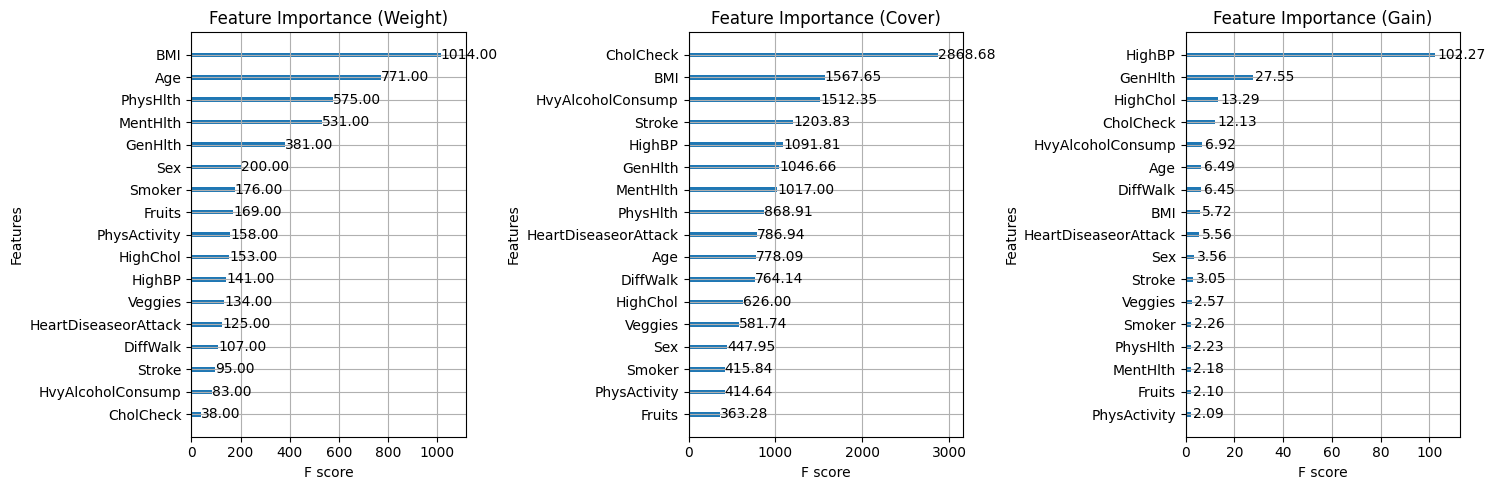

In [77]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Modelo XGBoost del pipeline
xgb_model = model_pipeline.named_steps['xgb']

# Se grafica la importancia de las características utilizando diferentes métricas
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

importance_types = ['weight', 'cover', 'gain']
titles = ['Feature Importance (Weight)', 'Feature Importance (Cover)', 'Feature Importance (Gain)']

for i, importance_type in enumerate(importance_types):
    plot_importance(xgb_model, importance_type=importance_type, ax=ax[i])
    ax[i].set_title(titles[i])

    # Se redondean las etiquetas de importancia
    for text in ax[i].texts:
        try:
            text.set_text(f"{float(text.get_text()):.2f}")
        except ValueError:
            pass

plt.tight_layout()
plt.show()

Si se observa el top de características que se obtiene para cada método, se aprecia que son diferentes, lo que se debe a cómo es el proceso que realizan para calcular las relevancias de las variables.

Por un lado, `weight` mide la importancia de una característica basada en el número de veces que se usa para dividir los nodos en todos los árboles (en este caso, `BMI, Age y PhysHlth` serían las variables que mejor permiten indicar si existe diabetes o no en base al número de separaciones en los nodos, lo que tiene sentido ya que al ser numéricas necesitan entablar un mayor número de umbrales). Por otro, `cover` mide la importancia de una característica en función de la cobertura de los datos, lo que se entiende como la cantidad promedio de muestras a través de las divisiones que incluyen esta característica (para el problema que se está revisando `CholCheck, BMI y HvyAlcoholConsump` serían las variables que logran separar de manera más rápida a las personas que tienen diabetes, lo cual se puede ver también en los gráficos realizados en la sección anterior, notando que si se tiene determinado valor en las variables es muy probable que se tenga una clasificación de diabetes). Por último, `gain` mide la mejora promedio en precisión lograda al usar la característica en los árboles (en este caso, `HighBP, GenHlth y HighChol` son las variables que se destacan por mejorar de mejor forma el desempeño del modelo).

Las importancias obtenidas ofrecen distintos tipos de interpretaciones básicas del modelo. Estas ayudan a identificar variables clave en el modelo (incluyendo separaciones según preferencia) que podrían relacionarse directamente con la probabilidad de padecer diabetes, lo cual es valioso para que el Dr. Simi entienda el impacto de los factores médicos sobre los resultados. Ahora bien, algo a considerar es que lo obtenido no indica cómo o por qué afecta la predicción, y que si existen variables correlacionadas, el modelo podría usar una o varias de ellas indistintamente, generando una importancia compartida entre las características correlacionadas, lo cual complica la interpretación.

## 4. Métodos Agnósticos Globales (10 puntos)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Tareas:
1. Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. `Nota:`Tenga cuidado con el orden de las columnas de este método. `Hint:` Puede obtener los features del clasificador con su respectivo orden mediante el método `.get_booster().feature_names` (2 puntos)
2. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala esta?). (2 puntos)
3. Visualice los resultados de este método en un gráfico. (2 puntos)
4. Además, responda las siguientes preguntas:
  - ¿Cómo mide la importancia de las features su propuesta? (1 punto)
  - ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido? (1 punto)
  - ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior? (1 punto)
  - Nombre y explique 3 ventajas y 3 desventajas del método implementado. (1 punto)

In [79]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# Conjunto de prueba
X_test_transformed = preprocessor.transform(X_test)
y_test_pred_original = xgb_model.predict(X_test_transformed)

# Precisión base sin permutaciones
baseline_accuracy = accuracy_score(y_test, y_test_pred_original)

# Número de repeticiones
n_repeats = 30
feature_names = xgb_model.get_booster().feature_names
feature_importance_results = pd.DataFrame(columns=feature_names)

# Importancia por permutación
for repeat in tqdm(range(n_repeats)):
    scores = []
    for col in feature_names:
        # Copia del conjunto de prueba
        X_permuted = X_test_transformed.copy()
        # Se permuta la columna
        X_permuted[col] = np.random.permutation(X_permuted[col].values)
        # Se predice y calcula la precisión con la columna permutada
        y_test_pred_permuted = xgb_model.predict(X_permuted)
        permuted_accuracy = accuracy_score(y_test, y_test_pred_permuted)
        # Se guarda la reducción en precisión
        importance_score = baseline_accuracy - permuted_accuracy
        scores.append(importance_score)
    # Se guardan los resultados para esta repetición
    feature_importance_results.loc[repeat] = scores

# Se calcula la media y desviación estándar de la importancia de características
feature_importance_mean = feature_importance_results.mean()
feature_importance_std = feature_importance_results.std()

100%|██████████| 30/30 [00:54<00:00,  1.83s/it]


In [84]:
print(f'Feature importance mean:\n{feature_importance_mean}')
print()
print(f'Feature importance std:\n{feature_importance_std}')

Feature importance mean:
Age                     0.025718
BMI                     0.029907
MentHlth                0.001120
PhysHlth                0.000199
GenHlth                 0.054419
Sex                     0.000872
HighChol                0.010283
CholCheck               0.003476
Smoker                  0.000073
HeartDiseaseorAttack    0.003924
PhysActivity            0.000483
Fruits                 -0.000174
Veggies                 0.000129
HvyAlcoholConsump       0.003319
DiffWalk                0.001716
Stroke                  0.001605
HighBP                  0.016319
dtype: float64

Feature importance std:
Age                     0.001895
BMI                     0.001912
MentHlth                0.000917
PhysHlth                0.000794
GenHlth                 0.002108
Sex                     0.000527
HighChol                0.001100
CholCheck               0.000452
Smoker                  0.000543
HeartDiseaseorAttack    0.000761
PhysActivity            0.000568
Fruits     

La desviación estándar de los valores de importancia calculados permite ver la estabilidad de la importancia de cada característica. Se puede ver que en general todas las características tienen una desviación estándar baja, lo que indica que su importancia es estable (no hay sensibilidad del modelo a esa característica) y no varía frente a permutaciones en los datos.

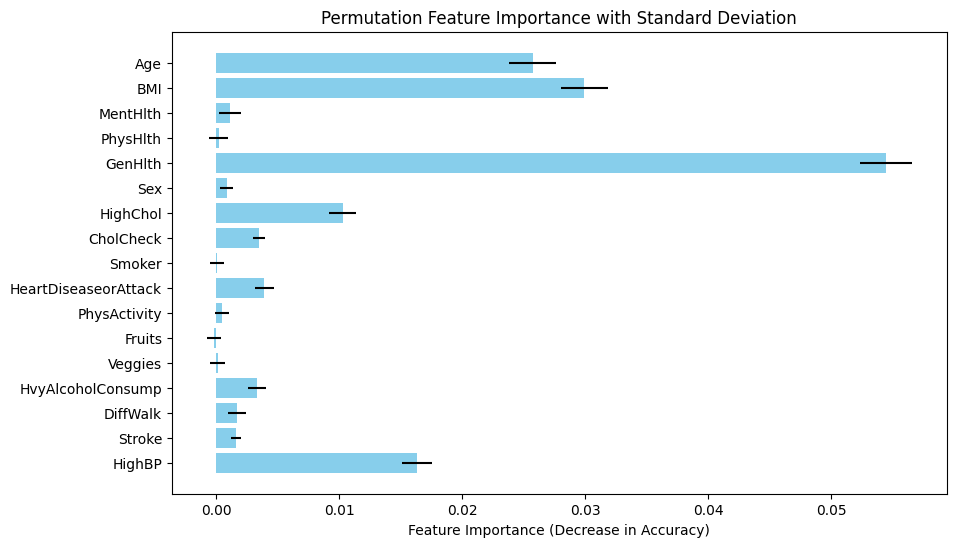

In [85]:
import matplotlib.pyplot as plt

# Gráfico de importancia de características con error estándar
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance_mean, xerr=feature_importance_std, color="skyblue", align="center")
plt.xlabel("Feature Importance (Decrease in Accuracy)")
plt.title("Permutation Feature Importance with Standard Deviation")
plt.gca().invert_yaxis()
plt.show()

La importancia por permutación calculada mide cuánto disminuye el accuracy del modelo cuando se permuta (reordena aleatoriamente) una característica. De esta forma, si el modelo depende fuertemente de una variable, permutar sus valores disminuirá significativamente esta métrica.

Las cinco características con mayor impacto en el modelo son GenHlth, BMI, Age, HighBP, y HighChol. Por un lado, GenHlth es un indicador de la percepción de la salud general del paciente. Tiene sentido que las personas que califican su salud como regular o mala a menudo presentan un mayor riesgo de desarrollar diabetes. El BMI (índice de masa corporal) está estrechamente relacionado con el riesgo de tener diabetes tipo 2, ya que el exceso de peso y/u obesidad son uno de los factores de riesgo más conocidos para esta condición. Por otro lado, es conocido que la probabilidad de desarrollar diabetes tipo 2 aumenta con la edad (Age); que la hipertensión (HighBP) es un factor de riesgo común entre las personas con diabetes, y que niveles altos de colesterol (HighChol) también son comunes en personas con diabetes.

Con respecto a lo realizado en el punto anterior, se destaca que la importancia por permutación es más confiable y directa, ya que mide el impacto en la precisión real del modelo. Este enfoque permite identificar el impacto de características clave de forma independiente, que no se reflejan en las importancias de los árboles debido a la correlación o ubicación en los nodos.

El método de permutación implementado tiene un serie de ventajas, entre las cuales se puede destacar que se basa en métricas, sin estar influenciado por la estructura del modelo; no se ve afectado por variables altamente correlacionadas, al evaluar cada característica de manera independiente; y que tiene una interpretabilidad intuitiva, ya que muestra el cambio en la predicción causado por cada variable, lo que facilita explicar los resultados a diferentes audiencias.

Por otro lado, entre las desventajas del método implementado está el costo computacional asociado al número de repeticiones involucrado en el proceso; la inestabilidad asociada que se podría apreciar si el conjunto de prueba es pequeño debido a la variabilidad que generan las permutaciones; y que puede experimentar sesgo si existen características importantes que no cuentan con mucha variabilidad, generando así que su importancia se reduzca.

## 5. Métodos Agnósticos Locales (20 puntos)

<p align="center">
  <img src="https://i.makeagif.com/media/10-24-2024/oMCrLI.gif" width="400">
</p>

### 5.1 Calculando Shap Values (4 puntos)

Tareas:
1. Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. (2 puntos)
2. ¿Qué representa cada número en su resultado? (1 punto)
3. ¿Es posible atribuir un significado a la positividad/negatividad de cada valor? (1 punto)

In [86]:
!pip install shap

In [87]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [93]:
import shap

# Modelo XGBoost del pipeline
xgb_model = model_pipeline.named_steps['xgb']

# Booster de XGBoost
booster = xgb_model.get_booster()

# Objeto explainer usando el modelo entrenado
explainer = shap.Explainer(booster)

# Se calculan los SHAP values para el conjunto de datos de prueba
shap_values = explainer(X_test_transformed)

In [99]:
shap_values

.values =
array([[ 0.19122018, -0.69601214,  0.05725629, ..., -0.06007885,
        -0.02158856, -0.655151  ],
       [ 0.6348514 ,  0.5168076 ,  0.0418565 , ...,  0.11921006,
        -0.01595894, -0.61570835],
       [-0.17223914, -0.2381809 ,  0.03415146, ..., -0.10844062,
        -0.00795483,  0.5085205 ],
       ...,
       [-0.83836734, -0.9962656 , -0.06435028, ..., -0.05699103,
        -0.00895197, -0.60527414],
       [ 0.25314033,  0.3243734 ,  0.00556721, ..., -0.06065821,
        -0.01514378,  0.48668754],
       [-1.5621557 , -0.1105438 , -0.01577243, ..., -0.0686218 ,
        -0.01298293, -0.7033417 ]], dtype=float32)

.base_values =
array([-0.00905643, -0.00905643, -0.00905643, ..., -0.00905643,
       -0.00905643, -0.00905643], dtype=float32)

.data =
array([[ 0.49892888, -0.96642111, -0.46024887, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.55049387,  0.43841784, -0.46024887, ...,  1.        ,
         0.        ,  0.        ],
       [-0.20211445, -0.

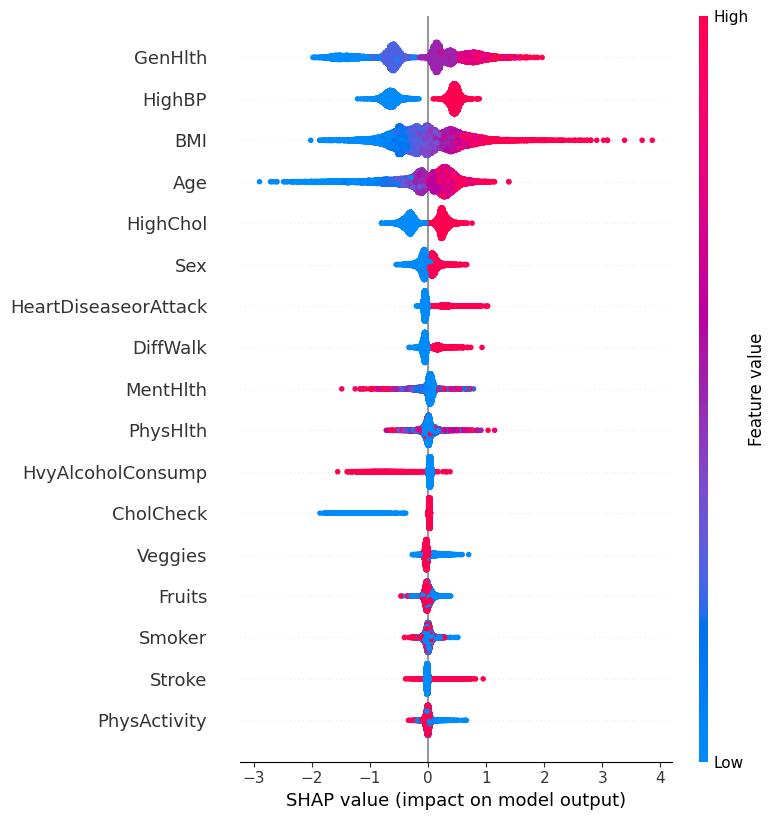

In [94]:
shap.summary_plot(shap_values, X_test_transformed)

Cada valor en el gráfico de SHAP representa el impacto marginal que tiene una característica específica en la predicción del modelo para cada fila del conjunto de personas. Valores positivos de SHAP para una característica significan que esa característica aumenta la probabilidad de que la predicción sea 1 (es decir, que la persona tenga diabetes). Por otro lado, valores negativos de SHAP indican que la característica disminuye la probabilidad de que la predicción sea 1 (es decir, contribuye a predecir que la persona no tiene diabetes). Es importante destacar que los colores indican los valores de cada característica: rojo/morado para valores altos, y azul para valores bajos.

En el gráfico, las características más importantes están ordenadas de arriba hacia abajo, donde la más importante es la primera (en este caso, GenHlth). Por ejemplo, si se observa específicamente la característica BMI, los puntos rojos a la derecha indican que un alto índice de masa corporal (BMI) aumenta la probabilidad de tener diabetes. Los puntos azules a la izquierda indican que un BMI bajo disminuye la probabilidad. A su vez, existe una zona difusa en la que valores altos, intermedios y bajos aumentan levemente la probabilidad de padecer la enfermadad.

### 5.2 Aporte local (4 puntos)

1. Usando los *shap values* calculados, grafique el **aporte local** de las diferentes variables para las instancias **1**, **9** y **150** (1 punto).

2. Interprete sus resultados y responda:

  - ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? (1 punto)

  - ¿Existe algún patrón común entre las instancias analizadas? (1 punto)

  - ¿Es posible generalizar estas conclusiones a todo el dataset? (1 punto)

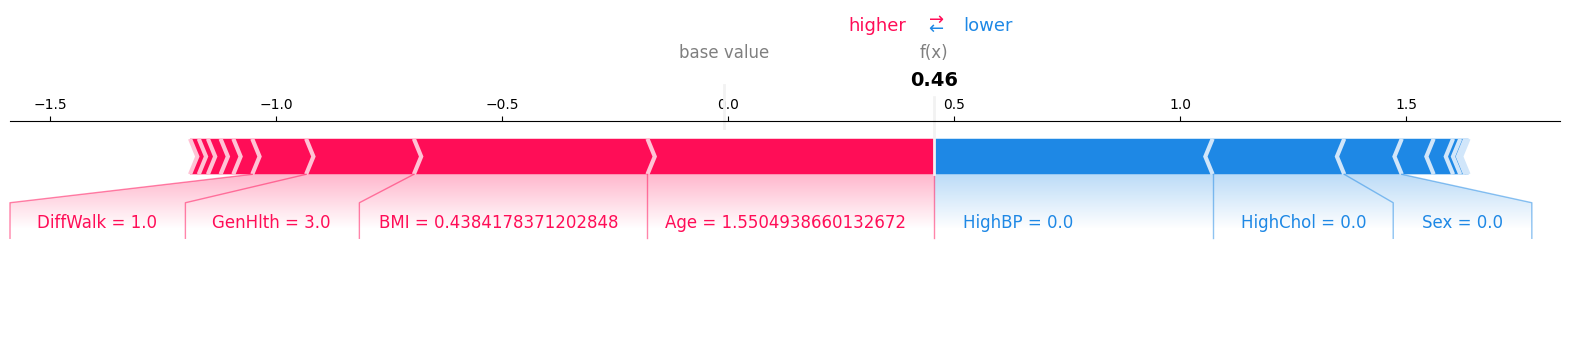

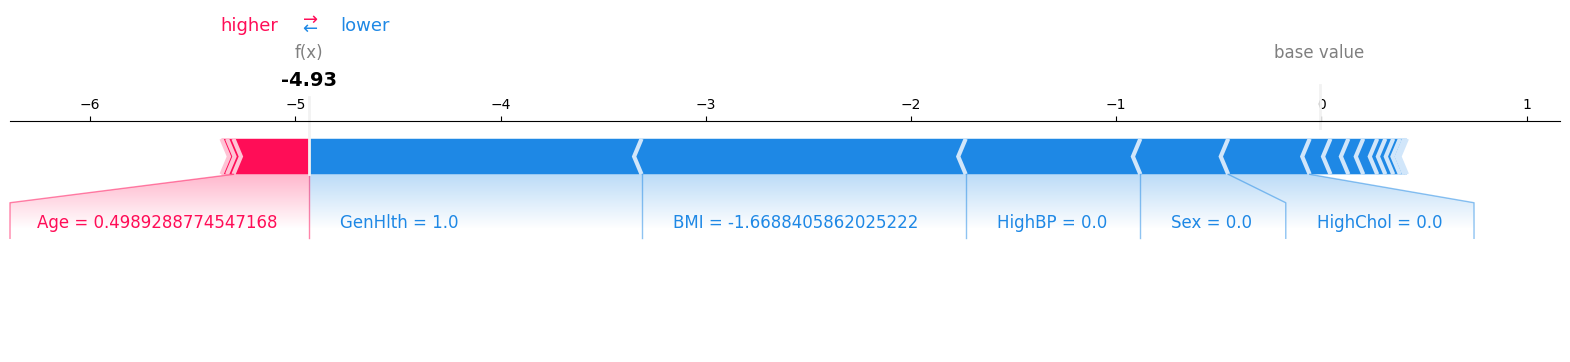

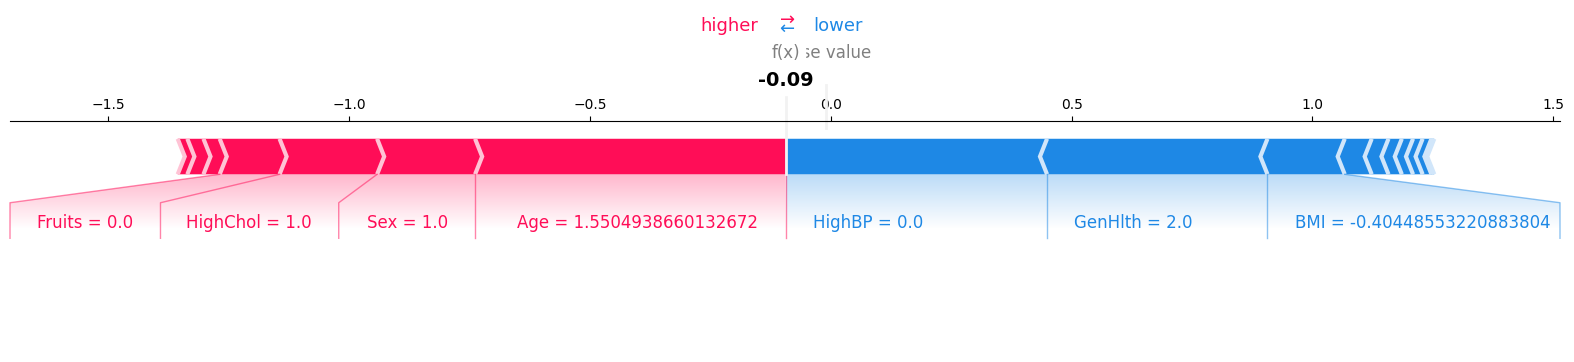

In [95]:
import shap

shap.force_plot(shap_values[1], matplotlib=True)  # Para la instancia 1
shap.force_plot(shap_values[9], matplotlib=True)  # Para la instancia 9
shap.force_plot(shap_values[150], matplotlib=True)  # Para la instancia 150

De los gráficos se concluye (se mencionan solo algunas de las variables):

- Age afecta de manera positiva a la probabilidad de poseer diabetes. Mientras mayor sea la edad, mayor es la probabilidad.

- HighBP tiene un impacto notorio en la probabilidad de tener diabetes. Si no se tiene la presión alta, es menor dicha posibilidad. Este es un patrón existente en las 3 instancias analizadas.

- Si se tiene colesterol alto (HighChol = 1), la probabilidad de que padezca diabetes aumenta. Por su parte, si no es alto, la probabilidad disminuye aproximadamente en la misma magnitud. Este también es un patrón para las instancias observadas.

Es importante destacar que generalizar estas conclusiones a todo el dataset no es apropiado, ya que los resultados observados en las instancias seleccionadas pueden ser representativos de un subgrupo del dataset, pero no necesariamente de todo el conjunto de datos. Para obtener una visión global de la importancia de las características es necesario analizar el SHAP summary plot (como se hizo anteriormente), que muestra la importancia general de las características a nivel de todo el conjunto de datos.

### 5.3 Aporte global (4 puntos)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

In [ ]:
# Nótese que esto se hizo en la sección de calculando Shap Values, ya que se pedía analizar la representación de los
# números obtenidos y respectivos significados, por lo que se realizó esta visualización del aporte global para estudiarlo.

Se destaca que las conclusiones obtenidas previamente a nivel de instancia se cumplen también a nivel global. Esto es un caso particular, y que no necesariamente permite concluir la generalización que se preguntaba en la sección anterior.

### 5.4 Scatter plot (4 puntos)


Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

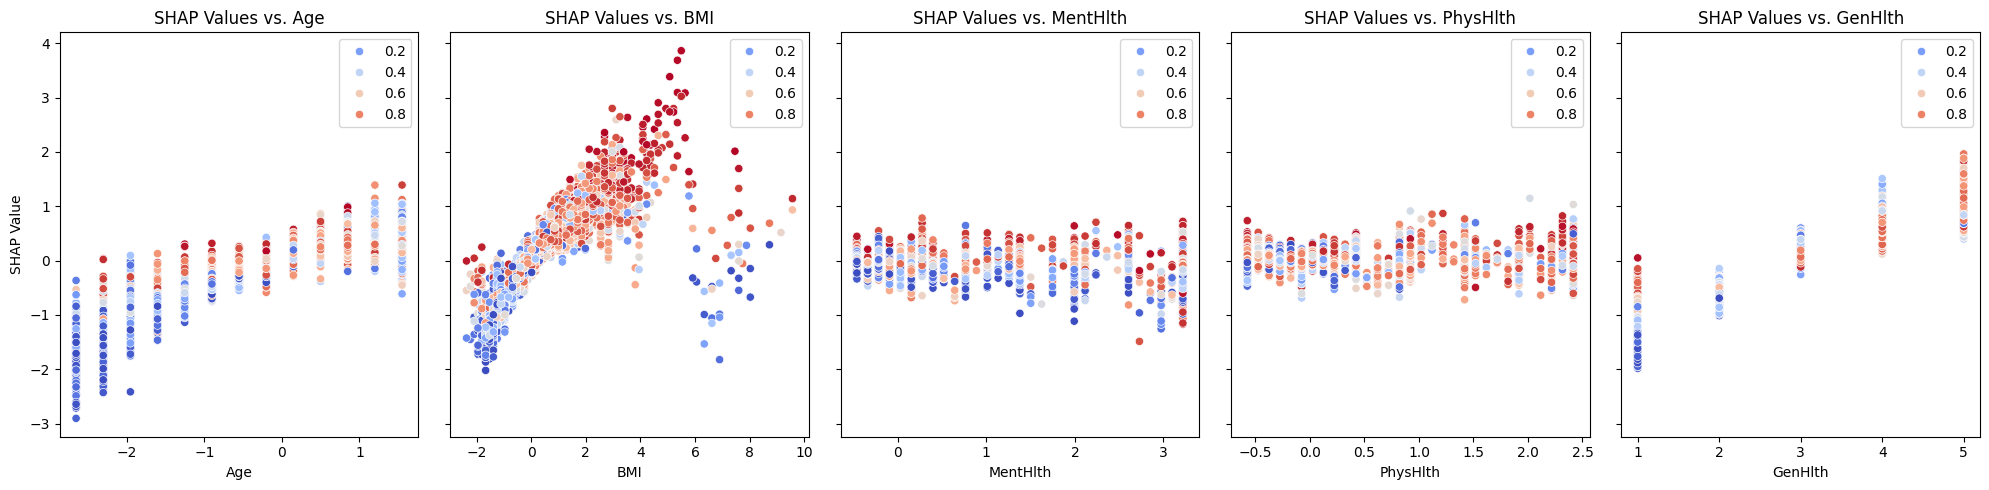

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

# Se extraen las primeras cinco características con mayor impacto global
top_features = X_test_transformed.columns[:5]

# Probabilidades de predicción para colorear
diabetes_probabilities = xgb_model.predict_proba(X_test_transformed)[:, 1]

# Scatterplot por cada una de las top features
fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)

for i, feature in enumerate(top_features):
    sns.scatterplot(
        x=X_test_transformed[feature],
        y=shap_values.values[:, i],  # SHAP values correspondientes a la feature actual
        hue=diabetes_probabilities,
        palette="coolwarm",
        ax=axes[i]
    )
    axes[i].set_title(f'SHAP Values vs. {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("SHAP Value")

plt.tight_layout()
plt.show()

Cada gráfico muestra si hay una tendencia en cómo los valores de la característica influyen en la probabilidad de diabetes. Se destaca como valores extremos de BMI disminuyen la probabilidad de tener diabetes, mientras que los que están entorno a la media cuentan con mayores opciones de padecer la enfermedad. Por otro lado, para MentHlth y PhysHlth se aprecia que no existe una gran diferenciación entre las posibilidades de tener diabetes o no al variar dentro del rango de valores de dichas variables. Por último, para Age y GenHlth se aprecia como a medida que aumenta el valor la posibilidades son mayores, pero con excepciones notorias a la regla.

### 5.5 Partial Dependence Plot (4 puntos)

Finalmente, se le pide generar un gráfico del tipo Partial Dependence Plot para las mismas 5 variables con mayor impacto global usando una submuestra de 1000 observaciones. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

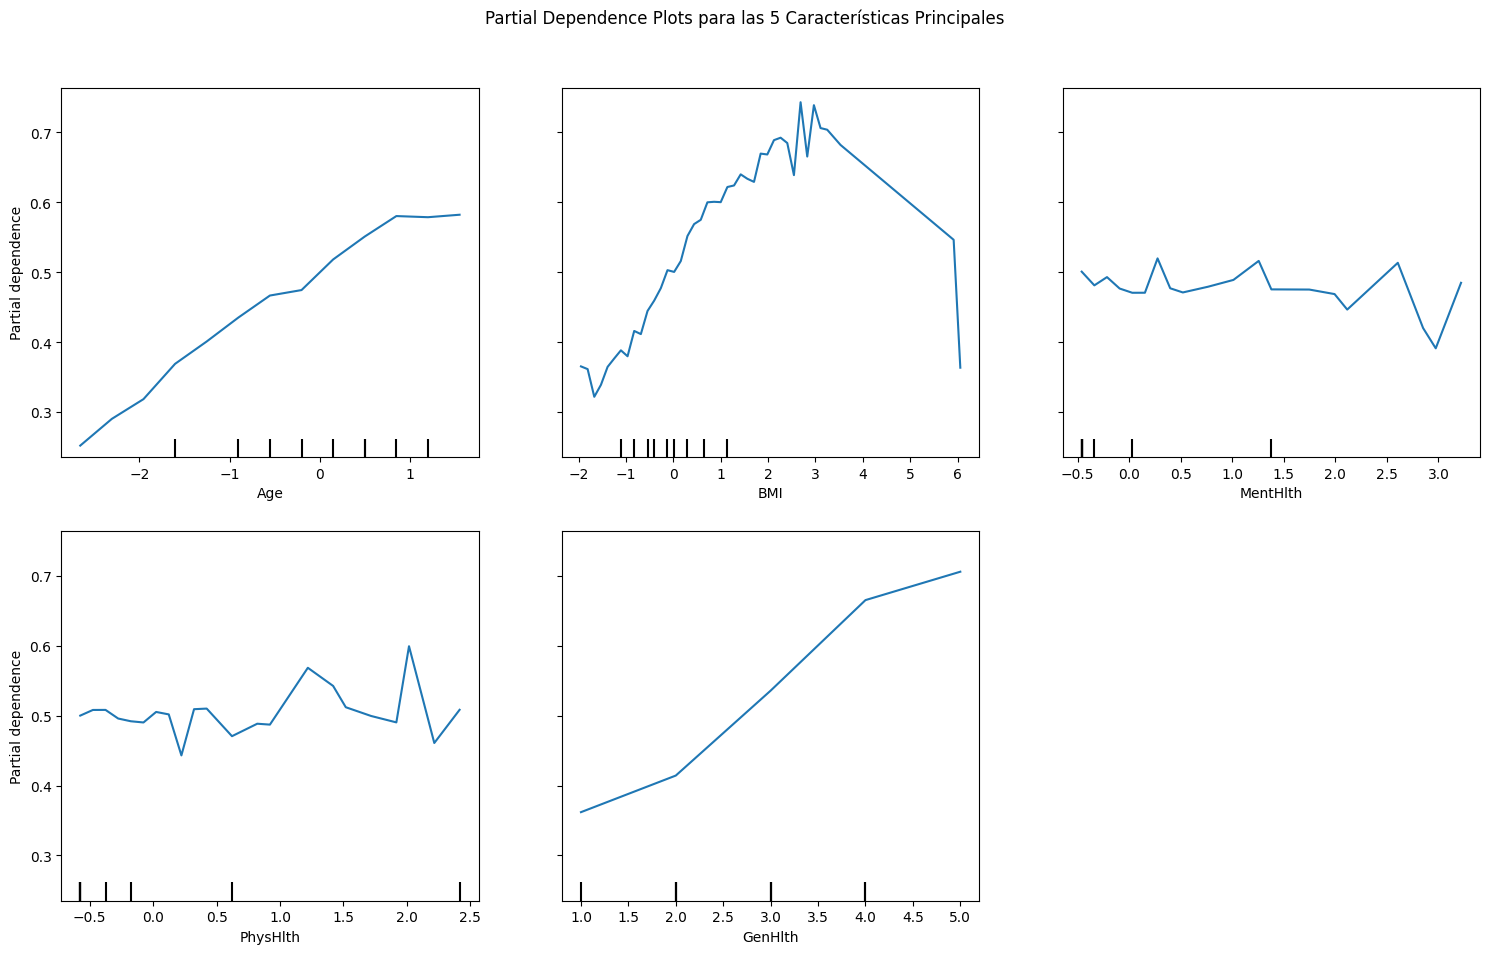

In [124]:
from sklearn.inspection import PartialDependenceDisplay

# Selección de una submuestra de 1000 observaciones
sample_X_test = X_test_transformed.sample(n=1000, random_state=0)

# Partial Dependence Plots
fig, ax = plt.subplots(figsize=(15, 10))
PartialDependenceDisplay.from_estimator(
    xgb_model,
    sample_X_test,
    features=top_features,
    kind="average",  # Gráfico PDP promedio
    ax=ax
)
plt.suptitle("Partial Dependence Plots para las 5 Características Principales")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Las tendencias evidenciadas en el gráfico se condicen con el análisis realizado previamente. Por un lado están las tendencias ascendentes para Age y GenHlth, estables para MentHlth y PhysHlth, y con forma de campana de Gauss para BMI.

Dado que el PDP es una media de efectos aislados de cada variable, los resultados suelen ser generalizables para entender el comportamiento general del modelo. Ahora bien, debido a la naturaleza compleja intrínseca de los datos por el contexto, y a las interacciones entre variables, el PDP puede no capturar completamente los efectos específicos de los subgrupos de datos.

## 6. Sistema de Reglas! (10 punto)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo.
En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

`Hint:` Como debe entregar las columnas que entran al clasificador entrenado de su pipeline, le será útil extraer el paso de preprocesamiento y generar dataframes preprocesados para el conjunto `train` y `test`.

In [125]:
!pip install alibi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.1/522.1 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 7.4 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 24.2.0
    Uninstalling attrs-24.2.0:
      Successfully uninstalled attrs-24.2.0
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.24.0
    Uninstalling scikit-image-0.24.0:
      Successfully uninstalled scikit-image-0.24.0


In [126]:
from alibi.explainers import AnchorTabular

In [130]:
# Paso de preprocesamiento del pipeline
preprocessing = model_pipeline.named_steps['preprocessor']

# Ddataframes preprocesados para el conjunto train y test
X_train_transformed = pd.DataFrame(preprocessing.transform(X_train), columns=X_train.columns)
X_test_transformed = pd.DataFrame(preprocessing.transform(X_test), columns=X_test.columns)

# Observaciones específicas
observations_to_explain = X_test_transformed.iloc[[1000, 3001, 5751]]

# Sistema de reglas
def apply_rules(df):
    predictions = []
    for _, row in df.iterrows():
        # Reglas fundamentadas en los análisis previos, en función de los gráficos
        if row['GenHlth'] >= 2 and row['BMI'] >= 1 and row['BMI'] <= 4 and row['Age'] > 0:
            predictions.append(1)  # Probabilidad alta de diabetes
        elif row['Age'] < -1 and row['BMI'] < 0 and row['BMI'] > 5:
            predictions.append(1)  # Probabilidad moderada-alta de diabetes
        else:
            predictions.append(0)  # Probabilidad baja de diabetes
    return predictions

# Se aplican reglas al conjunto completo y se comparan con las predicciones del model_pipeline
rules_predictions = apply_rules(X_test_transformed)
model_pipeline_predictions = model_pipeline.predict(X_test_transformed)

# Calcular precisión y cobertura poblacional
from sklearn.metrics import accuracy_score

precision = accuracy_score(model_pipeline_predictions, rules_predictions)
coverage = sum(rules_predictions) / len(rules_predictions)

# Resultados
print("Precisión de las reglas en el conjunto de datos:", precision)
print("Cobertura de la población con las reglas:", coverage)

Precisión de las reglas en el conjunto de datos: 0.8779630502807664
Cobertura de la población con las reglas: 0.06725534742166403


Se puede observar que las reglas propuestas generan un buen accuracy para el conjunto de datos, lo que permite concluir que los análisis previos llevan a una forma de generalizar apropiada. Ahora bien, la cobertura es baja debido a la gran combinación de variables que determinan si una persona tiene diabetes o no de manera exacta.

# Retrospectiva... (10 puntos)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

Los métodos agnósticos permiten entender las interacciones entre las variables predictoras y el cáncer de mejor forma. Esto es debido a que no dependen directamente del modelo en base a cual se está prediciendo. Además de lo anterior, permite ver cómo afecta marginalmente la variable o variables de interés en promedio para las personas en su conjunto, así como también para determinadas observaciones. Por ejemplo, se podría ver los SHAP values para ciertos grupos etarios y ver si dentro de estos existen patrones similares en cuanto a qué variables aportan más o menos, mostrando por ejemplo factores de riesgo, tales como hipertensión, BIM, entre otros. Al igual que factores de protección, por ejemplo ser mujer, o no consumir alcohol. Esto sirve como base para realizar políticas públicas con el propósito de disminuir el riesgo de las personas de tener diabetes, por ejemplo crear campañas contra el tabaco, que motiven a realizar deporte e informar sobre los beneficios de incluir vegetales en la dieta, etcétera.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>